Height: 4, Aspect: 1.33


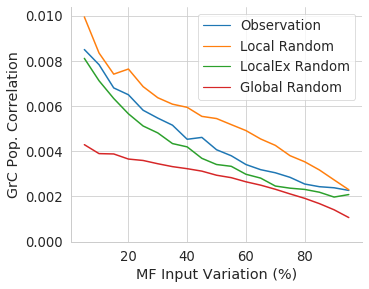

Height: 4, Aspect: 1.33


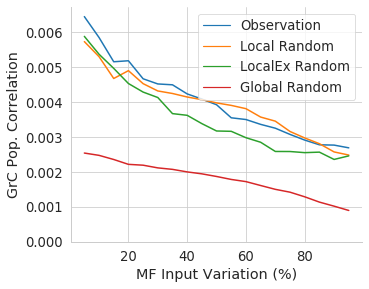

Height: 4, Aspect: 1.33


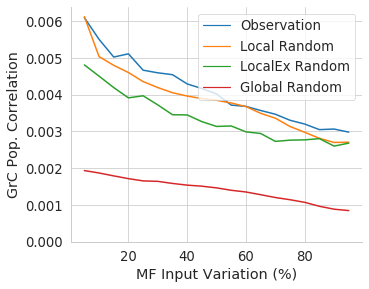

Height: 4, Aspect: 1.33


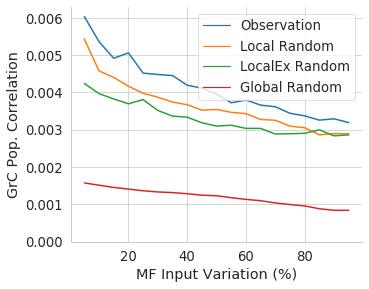

Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33
Height: 4, Aspect: 1.33


In [7]:
import random
import copy
import logging
import sys

from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'plot_popcorr_noise_by_activation_level_210117_1024'

show = True

# db = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/data/batch_similarity_by_activation_level_201210_1024.gz')
# db = db[0]

db = {}

db_observation = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/data/batch_similarity_by_activation_level_210117_data_1024.gz')
db['data'] = db_observation

db_local = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/data/batch_similarity_by_activation_level_210117_naive_random_1024.gz')
db['naive_random'] = db_local

db_ex30 = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/data/batch_similarity_by_activation_level_210117_expanded_random_30_1024.gz')
db['expanded_random_30'] = db_ex30

db_global_random = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/data/batch_similarity_by_activation_level_210117_global_random_global_random_4096.gz')
db['global_random'] = db_global_random

def get_plot_name(model_name):
    if 'data' in model_name:
        return 'Observation'
    if 'classic_random' in model_name:
        return 'Classic Random'
    if 'naive_random' in model_name:
        return 'Local Random'
        # return model_name
    if 'data' in model_name:
        return 'Data'
    if 'data' in model_name:
        return 'Data'
    if 'expanded_random_30' in model_name:
        return 'LocalEx Random'
    if 'expanded_random_50' in model_name:
        return 'LocalEx50 Random'
    if 'global_random' in model_name:
        return 'Global Random'
    return 'Unknown'

os.makedirs(script_n, exist_ok=True)

for activation_level in db['data'][0]:
    mpd = MyPlotData()
    for model_name in [
            'data',
#             'naive_random_17_4',
            'naive_random',
#             'classic_random',
            'expanded_random_30',
#             'expanded_random_50',
            'global_random',
            ]:
        resss = db[model_name]
        resss = resss[0]
        ress = resss[activation_level]
        for noise_level, res in ress.items():
            hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=get_plot_name(model_name),
                # mf_dim=res[0]['mf_dim'],
                activation_level=activation_level,
                noise_level=noise_level*100,
                grc_dim=res['grc_dim'],
                pct_grc=res['pct_grc']/100,
                pct_mfs=res['pct_mfs']/100,
                # pct_mf_dim=res['pct_mf_dim']/100,
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                hamming_distance_norm=hamming_distance_norm,
                # hamming_distance_norm_max=hamming_distance_norm_max,
                )

    if activation_level <= .20:
        show = True
    else:
        show = False
    importlib.reload(my_plot); my_plot.my_relplot(
        mpd,
        x='noise_level',
        y='grc_pop_corr',
        hue='model',
        context='paper',
        height=4,
        aspect=1.33,
        ylim=[0, None],
        custom_legend_loc='upper right',
        y_axis_label='GrC Pop. Correlation',
        x_axis_label='MF Input Variation (%)',
        save_filename=f'{script_n}/{script_n}_{activation_level*100}.svg',
        show=show,
        )


In [5]:
print(db['data'][0][.05][.05])

{'voi': 0.15017789189467265, 'binary_similarity': 0.9035505022321529, 'hamming_distance': 14.121826171875, 'normalized_mse': 0.12275045566408797, 'grc_pop_corr': 0.007614677529275543, 'mf_dim': 366.8848427167897, 'mf_pop_corr': 0.0013890858669921063, 'grc_dim': 143.52663439295785, 'pct_grc': 11.8, 'pct_mfs': 29.4, 'num_grcs': 1211, 'num_mfs': 487}
